In [1]:
import pandas as pd 

BY - Amirtha Ganesh R

In [2]:
df = pd.read_csv("E:\Water quality _wqi and wqc\water_dataX.csv",encoding='latin1')

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\admin\AppData\Local\Temp\ipykernel_13512\2792185362.py:1: SyntaxWarning: invalid escape sequence '\W'
  df = pd.read_csv("E:\Water quality _wqi and wqc\water_dataX.csv",encoding='latin1')


In [3]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [4]:
desired_columns = ['Temp', 'D.O. (mg/l)', 'PH', 'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)', 'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)', 'TOTAL COLIFORM (MPN/100ml)Mean' ]
df = df[desired_columns]

In [5]:
# Rename columns for clarity
df = df.rename(columns={
    'Temp': 'Temperature',
    'D.O. (mg/l)': 'DissolvedOxygen',
    'PH': 'pH',
    'CONDUCTIVITY (µmhos/cm)': 'Conductivity',
    'B.O.D. (mg/l)': 'BOD',
    'NITRATENAN N+ NITRITENANN (mg/l)': 'Nitrates',
    'FECAL COLIFORM (MPN/100ml)': 'FecalColiform',
    'TOTAL COLIFORM (MPN/100ml)Mean': 'TotalColiform'
})

In [6]:
# Handle 'NAN' strings and convert to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert 'NAN' strings to NaN and ensure numeric

In [7]:
df.isnull().sum().sum()


872

# MISSING DATA ANALYSIS AND HANDLING

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings('ignore')

def analyze_missing_data(df):
    """Comprehensive missing data analysis"""
    print("🔍 MISSING DATA ANALYSIS")
    print("=" * 50)
    
    # Create missing data summary
    missing_summary = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum().values,
        'Missing_Percentage': (df.isnull().sum().values / len(df)) * 100,
        'Data_Type': df.dtypes.values
    })
    
    # Filter columns with missing data
    missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values(
        'Missing_Percentage', ascending=False
    )
    
    print(f"📊 Dataset shape: {df.shape}")
    print(f"📊 Total missing values: {df.isnull().sum().sum()}")
    print(f"📊 Columns with missing data: {len(missing_summary)}")
    
    if len(missing_summary) > 0:
        print("\n📋 Missing data by column:")
        print(missing_summary.to_string(index=False))
        
        # Visualize missing data pattern
        plt.figure(figsize=(14, 8))
        
        # Missing values count
        plt.subplot(2, 2, 1)
        missing_data = df.isnull().sum().sort_values(ascending=False)
        missing_data = missing_data[missing_data > 0]
        missing_data.plot(kind='bar', color='coral')
        plt.title('Missing Values Count by Column')
        plt.xlabel('Columns')
        plt.ylabel('Missing Count')
        plt.xticks(rotation=45)
        
        # Missing values percentage
        plt.subplot(2, 2, 2)
        missing_percentage = (missing_data / len(df)) * 100
        missing_percentage.plot(kind='bar', color='skyblue')
        plt.title('Missing Values Percentage')
        plt.xlabel('Columns')
        plt.ylabel('Missing Percentage (%)')
        plt.xticks(rotation=45)
        
        # Heatmap of missing values
        plt.subplot(2, 2, 3)
        sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
        plt.title('Missing Values Heatmap')
        
        # Missing data correlation
        plt.subplot(2, 2, 4)
        missing_corr = df.isnull().corr()
        sns.heatmap(missing_corr, annot=True, cmap='RdYlBu', center=0)
        plt.title('Missing Data Correlation')
        
        plt.tight_layout()
        plt.show()
        
        # Missing data patterns
        print("\n🔍 Missing Data Patterns:")
        missing_pattern = df.isnull().sum(axis=1).value_counts().sort_index()
        print(f"Rows with 0 missing values: {missing_pattern.get(0, 0)}")
        for i in range(1, missing_pattern.index.max() + 1):
            if missing_pattern.get(i, 0) > 0:
                print(f"Rows with {i} missing values: {missing_pattern.get(i, 0)}")
    
    else:
        print("✅ No missing values found!")
    
    return missing_summary

def handle_missing_values(df, strategy='knn'):
    """Handle missing values with different strategies"""
    print(f"\n🔧 HANDLING MISSING VALUES - Strategy: {strategy.upper()}")
    print("=" * 50)
    
    df_processed = df.copy()
    
    # Separate numeric and categorical columns
    numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
    
    print(f"📊 Numeric columns: {len(numeric_cols)}")
    print(f"📊 Categorical columns: {len(categorical_cols)}")
    
    # Handle categorical missing values first
    for col in categorical_cols:
        missing_count = df_processed[col].isnull().sum()
        if missing_count > 0:
            mode_value = df_processed[col].mode()[0] if len(df_processed[col].mode()) > 0 else 'Unknown'
            df_processed[col].fillna(mode_value, inplace=True)
            print(f"✅ {col}: Filled {missing_count} missing values with mode '{mode_value}'")
    
    # Handle numeric missing values based on strategy
    numeric_missing = df_processed[numeric_cols].isnull().sum()
    numeric_cols_with_missing = numeric_missing[numeric_missing > 0].index.tolist()
    
    if len(numeric_cols_with_missing) > 0:
        print(f"\n🔢 Processing {len(numeric_cols_with_missing)} numeric columns with missing values...")
        
        if strategy == 'mean':
            imputer = SimpleImputer(strategy='mean')
            df_processed[numeric_cols] = imputer.fit_transform(df_processed[numeric_cols])
            print("✅ Applied mean imputation")
            
        elif strategy == 'median':
            imputer = SimpleImputer(strategy='median')
            df_processed[numeric_cols] = imputer.fit_transform(df_processed[numeric_cols])
            print("✅ Applied median imputation")
            
        elif strategy == 'knn':
            print("🔄 Applying KNN imputation (k=5)...")
            imputer = KNNImputer(n_neighbors=5)
            df_processed[numeric_cols] = imputer.fit_transform(df_processed[numeric_cols])
            print("✅ Applied KNN imputation")
            
        elif strategy == 'forward_fill':
            df_processed[numeric_cols] = df_processed[numeric_cols].fillna(method='ffill')
            # Fill any remaining NaN with median
            df_processed[numeric_cols] = df_processed[numeric_cols].fillna(df_processed[numeric_cols].median())
            print("✅ Applied forward fill + median backup")
    
    # Verify no missing values remain
    remaining_missing = df_processed.isnull().sum().sum()
    print(f"\n📊 Missing values before: {df.isnull().sum().sum()}")
    print(f"📊 Missing values after: {remaining_missing}")
    
    if remaining_missing == 0:
        print("🎉 All missing values handled successfully!")
    else:
        print(f"⚠️ {remaining_missing} missing values still remain")
        remaining_cols = df_processed.columns[df_processed.isnull().any()].tolist()
        print(f"Columns with remaining missing values: {remaining_cols}")
    
    return df_processed

def compare_imputation_strategies(df, strategies=['mean', 'median', 'knn']):
    """Compare different imputation strategies"""
    print("\n📊 COMPARING IMPUTATION STRATEGIES")
    print("=" * 50)
    
    # Focus on water quality parameters
    water_params = ['Temperature', 'DissolvedOxygen', 'pH', 'Conductivity', 
                   'BOD', 'Nitrates', 'FecalColiform', 'TotalColiform']
    
    available_params = [col for col in water_params if col in df.columns and df[col].isnull().sum() > 0]
    
    if len(available_params) == 0:
        print("No missing values in water quality parameters to compare!")
        return
    
    comparison_results = {}
    
    for strategy in strategies:
        df_imputed = handle_missing_values(df, strategy=strategy)
        comparison_results[strategy] = {}
        
        for param in available_params:
            comparison_results[strategy][param] = {
                'mean': df_imputed[param].mean(),
                'median': df_imputed[param].median(),
                'std': df_imputed[param].std()
            }
    
    # Create comparison DataFrame
    comparison_df = []
    for param in available_params:
        for strategy in strategies:
            row = {
                'Parameter': param,
                'Strategy': strategy,
                'Mean': comparison_results[strategy][param]['mean'],
                'Median': comparison_results[strategy][param]['median'],
                'Std': comparison_results[strategy][param]['std']
            }
            comparison_df.append(row)
    
    comparison_df = pd.DataFrame(comparison_df)
    
    # Visualize comparison
    if len(available_params) > 0:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        for i, metric in enumerate(['Mean', 'Median', 'Std']):
            pivot_data = comparison_df.pivot(index='Parameter', columns='Strategy', values=metric)
            pivot_data.plot(kind='bar', ax=axes[i], title=f'{metric} Comparison Across Strategies')
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].legend(title='Strategy')
        
        plt.tight_layout()
        plt.show()
    
    print("\n📋 Imputation Strategy Comparison:")
    print(comparison_df.to_string(index=False))
    
    return comparison_df


🔍 MISSING DATA ANALYSIS
📊 Dataset shape: (1991, 8)
📊 Total missing values: 872
📊 Columns with missing data: 8

📋 Missing data by column:
         Column  Missing_Count  Missing_Percentage Data_Type
  FecalColiform            316           15.871421   float64
       Nitrates            225           11.300854   float64
  TotalColiform            132            6.629834   float64
    Temperature             92            4.620794   float64
            BOD             43            2.159719   float64
DissolvedOxygen             31            1.557007   float64
   Conductivity             25            1.255650   float64
             pH              8            0.401808   float64


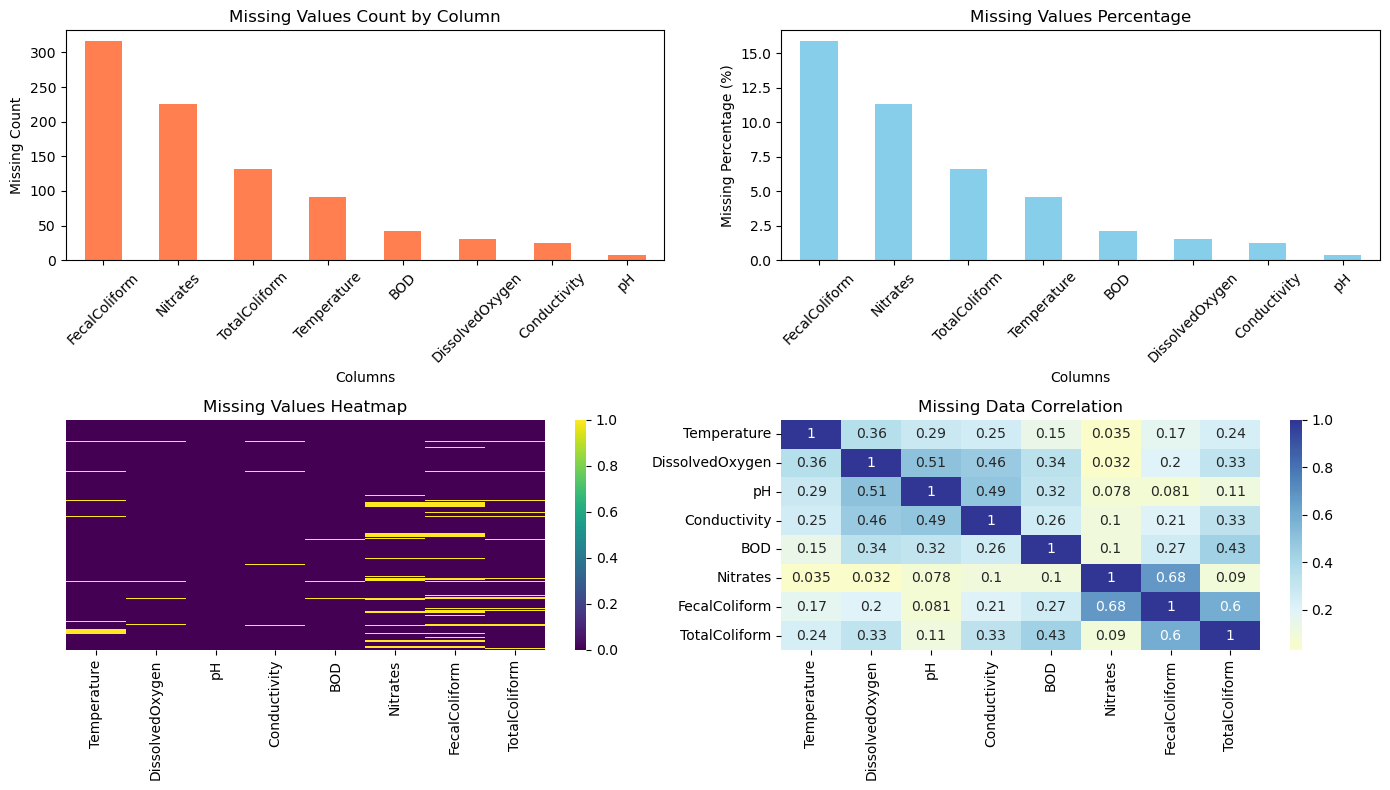


🔍 Missing Data Patterns:
Rows with 0 missing values: 1577
Rows with 1 missing values: 115
Rows with 2 missing values: 209
Rows with 3 missing values: 52
Rows with 4 missing values: 21
Rows with 5 missing values: 11
Rows with 6 missing values: 2
Rows with 8 missing values: 4

🔧 HANDLING MISSING VALUES - Strategy: KNN
📊 Numeric columns: 8
📊 Categorical columns: 0

🔢 Processing 8 numeric columns with missing values...
🔄 Applying KNN imputation (k=5)...
✅ Applied KNN imputation

📊 Missing values before: 872
📊 Missing values after: 0
🎉 All missing values handled successfully!

📊 COMPARING IMPUTATION STRATEGIES

🔧 HANDLING MISSING VALUES - Strategy: MEAN
📊 Numeric columns: 8
📊 Categorical columns: 0

🔢 Processing 8 numeric columns with missing values...
✅ Applied mean imputation

📊 Missing values before: 872
📊 Missing values after: 0
🎉 All missing values handled successfully!

🔧 HANDLING MISSING VALUES - Strategy: MEDIAN
📊 Numeric columns: 8
📊 Categorical columns: 0

🔢 Processing 8 numeric 

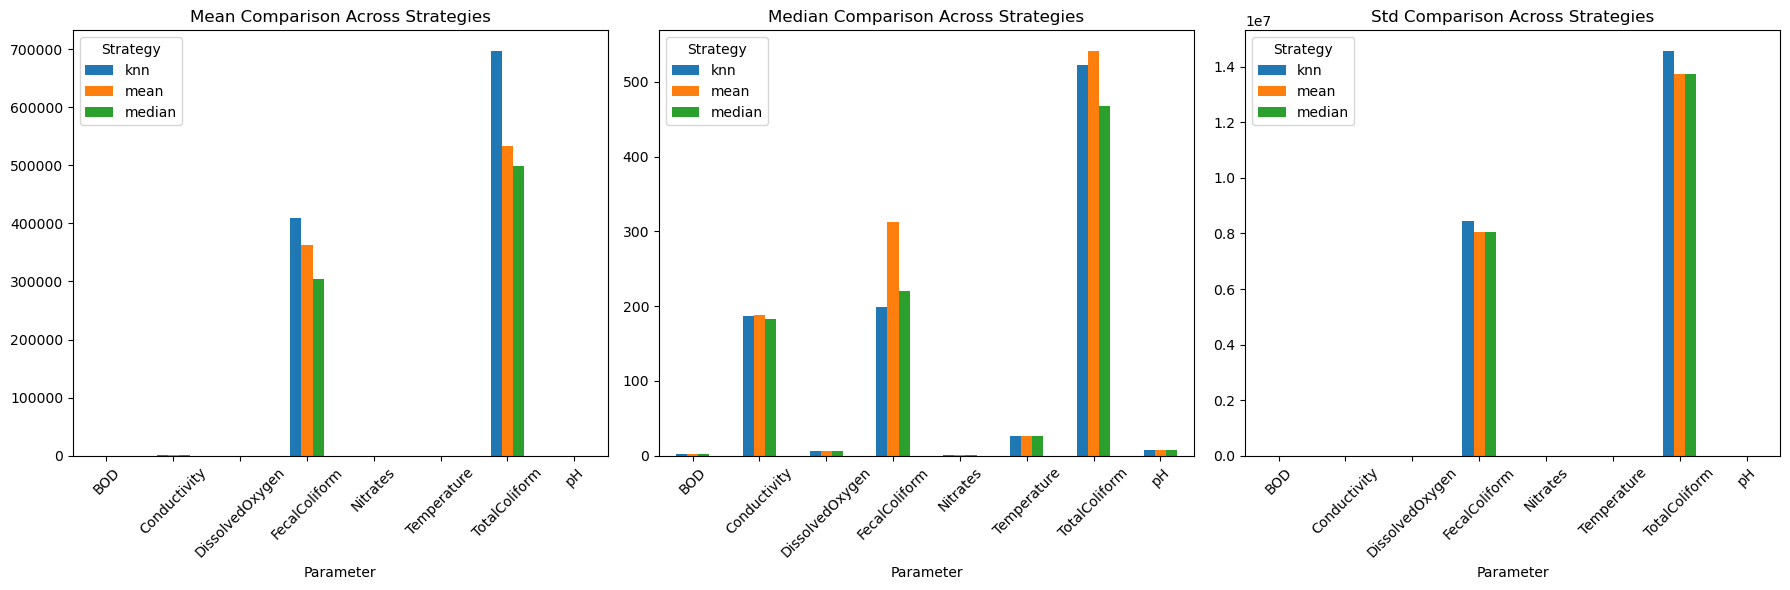


📋 Imputation Strategy Comparison:
      Parameter Strategy          Mean   Median          Std
    Temperature     mean     26.209814  27.0000 3.287652e+00
    Temperature   median     26.246327  27.0000 3.291836e+00
    Temperature      knn     26.173861  27.0000 3.302323e+00
DissolvedOxygen     mean      6.392637   6.7000 1.322515e+00
DissolvedOxygen   median      6.397422   6.7000 1.323062e+00
DissolvedOxygen      knn      6.390060   6.7000 1.327746e+00
             pH     mean    112.090674   7.3000 1.875150e+03
             pH   median    111.669617   7.3000 1.875162e+03
             pH      knn    111.880832   7.3000 1.875156e+03
   Conductivity     mean   1786.466394 187.6300 5.517290e+03
   Conductivity   median   1766.332461 183.0000 5.520180e+03
   Conductivity      knn   1817.064398 187.4000 5.561448e+03
            BOD     mean      6.940049   1.9000 2.908065e+01
            BOD   median      6.831122   1.8965 2.908990e+01
            BOD      knn      7.332608   1.9000 2.

In [10]:
# Step 1: Analyze your missing data
missing_summary = analyze_missing_data(df)

# Step 2: Handle missing values (KNN recommended)
df_cleaned = handle_missing_values(df, strategy='knn')

# Step 3: Optional - Compare strategies
comparison = compare_imputation_strategies(df)

# DATA VALIDATION AND OUTLIER DETECTION

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def validate_water_quality_ranges(df):
    """Validate water quality parameters against expected ranges"""
    print("🔍 WATER QUALITY DATA VALIDATION")
    print("=" * 50)
    
    # Expected ranges for water quality parameters
    expected_ranges = {
        'Temperature': (0, 50),      # °C
        'DissolvedOxygen': (0, 20),  # mg/L
        'pH': (0, 14),               # pH scale
        'Conductivity': (0, 10000),  # µmhos/cm
        'BOD': (0, 100),             # mg/L
        'Nitrates': (0, 50),         # mg/L
        'FecalColiform': (0, 100000), # MPN/100ml
        'TotalColiform': (0, 1000000) # MPN/100ml
    }
    
    validation_results = {}
    
    print("📋 Parameter Validation Results:")
    print("-" * 70)
    
    for param, (min_val, max_val) in expected_ranges.items():
        if param in df.columns:
            data = df[param]
            
            # Calculate statistics
            actual_min = data.min()
            actual_max = data.max()
            actual_mean = data.mean()
            actual_median = data.median()
            
            # Check for out-of-range values
            below_range = (data < min_val).sum()
            above_range = (data > max_val).sum()
            total_invalid = below_range + above_range
            
            validation_results[param] = {
                'min': actual_min,
                'max': actual_max,
                'mean': actual_mean,
                'median': actual_median,
                'below_range': below_range,
                'above_range': above_range,
                'total_invalid': total_invalid,
                'valid_percentage': ((len(data) - total_invalid) / len(data)) * 100
            }
            
            # Print results
            status = "✅" if total_invalid == 0 else "⚠️"
            print(f"{status} {param:15} | Range: [{min_val:6}, {max_val:8}] | "
                  f"Actual: [{actual_min:8.2f}, {actual_max:10.2f}] | "
                  f"Invalid: {total_invalid:4}")
    
    return validation_results

def detect_outliers_comprehensive(df, methods=['iqr', 'zscore', 'isolation']):
    """Comprehensive outlier detection using multiple methods"""
    print(f"\n🎯 OUTLIER DETECTION - Methods: {', '.join(methods).upper()}")
    print("=" * 50)
    
    water_params = ['Temperature', 'DissolvedOxygen', 'pH', 'Conductivity', 
                   'BOD', 'Nitrates', 'FecalColiform', 'TotalColiform']
    
    available_params = [col for col in water_params if col in df.columns]
    outlier_results = {}
    
    for param in available_params:
        outlier_results[param] = {}
        data = df[param].dropna()
        
        # Method 1: IQR
        if 'iqr' in methods:
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            iqr_outliers = ((data < lower_bound) | (data > upper_bound)).sum()
            outlier_results[param]['iqr'] = {
                'count': iqr_outliers,
                'percentage': (iqr_outliers / len(data)) * 100,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
        
        # Method 2: Z-Score
        if 'zscore' in methods:
            z_scores = np.abs(stats.zscore(data))
            zscore_outliers = (z_scores > 3).sum()
            outlier_results[param]['zscore'] = {
                'count': zscore_outliers,
                'percentage': (zscore_outliers / len(data)) * 100
            }
        
        # Method 3: Modified Z-Score (more robust)
        if 'modified_zscore' in methods:
            median = data.median()
            mad = np.median(np.abs(data - median))
            modified_z_scores = 0.6745 * (data - median) / mad
            modified_zscore_outliers = (np.abs(modified_z_scores) > 3.5).sum()
            outlier_results[param]['modified_zscore'] = {
                'count': modified_zscore_outliers,
                'percentage': (modified_zscore_outliers / len(data)) * 100
            }
    
    # Create summary table
    summary_data = []
    for param in available_params:
        row = {'Parameter': param}
        for method in methods:
            if method in outlier_results[param]:
                row[f'{method}_count'] = outlier_results[param][method]['count']
                row[f'{method}_percent'] = outlier_results[param][method]['percentage']
        summary_data.append(row)
    
    summary_df = pd.DataFrame(summary_data)
    
    print("\n📊 Outlier Detection Summary:")
    print(summary_df.to_string(index=False))
    
    return outlier_results, summary_df

def visualize_outliers(df, params=None):
    """Create comprehensive outlier visualizations"""
    print(f"\n📊 OUTLIER VISUALIZATION")
    print("=" * 50)
    
    if params is None:
        params = ['Temperature', 'DissolvedOxygen', 'pH', 'Conductivity', 
                 'BOD', 'Nitrates', 'FecalColiform', 'TotalColiform']
    
    available_params = [col for col in params if col in df.columns]
    
    if len(available_params) == 0:
        print("No parameters available for visualization!")
        return
    
    # Create subplots
    n_params = len(available_params)
    n_cols = 4
    n_rows = (n_params + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for idx, param in enumerate(available_params):
        row = idx // n_cols
        col = idx % n_cols
        
        # Box plot
        axes[row, col].boxplot(df[param].dropna(), patch_artist=True)
        axes[row, col].set_title(f'{param}\nOutlier Detection')
        axes[row, col].set_ylabel('Value')
        
        # Add statistics text
        q1 = df[param].quantile(0.25)
        q3 = df[param].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outliers = ((df[param] < lower_bound) | (df[param] > upper_bound)).sum()
        axes[row, col].text(0.02, 0.98, f'Outliers: {outliers}', 
                           transform=axes[row, col].transAxes, 
                           verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Hide empty subplots
    for idx in range(n_params, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Distribution plots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for idx, param in enumerate(available_params):
        row = idx // n_cols
        col = idx % n_cols
        
        # Histogram with KDE
        axes[row, col].hist(df[param].dropna(), bins=50, alpha=0.7, density=True)
        
        # Add KDE line
        try:
            df[param].dropna().plot(kind='kde', ax=axes[row, col], color='red', linewidth=2)
        except:
            pass
        
        axes[row, col].set_title(f'{param} - Distribution')
        axes[row, col].set_xlabel('Value')
        axes[row, col].set_ylabel('Density')
    
    # Hide empty subplots
    for idx in range(n_params, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def handle_outliers(df, method='cap', outlier_results=None):
    """Handle outliers using various methods"""
    print(f"\n🛠️ HANDLING OUTLIERS - Method: {method.upper()}")
    print("=" * 50)
    
    df_processed = df.copy()
    water_params = ['Temperature', 'DissolvedOxygen', 'pH', 'Conductivity', 
                   'BOD', 'Nitrates', 'FecalColiform', 'TotalColiform']
    
    available_params = [col for col in water_params if col in df.columns]
    outlier_summary = {}
    
    for param in available_params:
        original_outliers = 0
        
        if method == 'cap':
            # IQR-based capping
            Q1 = df_processed[param].quantile(0.25)
            Q3 = df_processed[param].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count original outliers
            original_outliers = ((df_processed[param] < lower_bound) | 
                               (df_processed[param] > upper_bound)).sum()
            
            # Cap the outliers
            df_processed[param] = np.clip(df_processed[param], lower_bound, upper_bound)
            
        elif method == 'remove':
            # Remove outliers (not recommended for small datasets)
            Q1 = df_processed[param].quantile(0.25)
            Q3 = df_processed[param].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            original_outliers = ((df_processed[param] < lower_bound) | 
                               (df_processed[param] > upper_bound)).sum()
            
            # Remove outliers
            mask = (df_processed[param] >= lower_bound) & (df_processed[param] <= upper_bound)
            df_processed = df_processed[mask]
        
        elif method == 'transform':
            # Log transformation for highly skewed data
            if df_processed[param].min() > 0:  # Only if all values are positive
                original_outliers = "N/A (transformation)"
                df_processed[param] = np.log1p(df_processed[param])
            else:
                original_outliers = "Skipped (negative values)"
        
        outlier_summary[param] = original_outliers
        
        if isinstance(original_outliers, int):
            percentage = (original_outliers / len(df)) * 100
            print(f"✅ {param:15}: {original_outliers:4} outliers ({percentage:5.1f}%) handled")
    
    print(f"\n📊 Dataset shape before: {df.shape}")
    print(f"📊 Dataset shape after:  {df_processed.shape}")
    
    return df_processed, outlier_summary


🔍 WATER QUALITY DATA VALIDATION
📋 Parameter Validation Results:
----------------------------------------------------------------------
✅ Temperature     | Range: [     0,       50] | Actual: [   10.00,      35.00] | Invalid:    0
✅ DissolvedOxygen | Range: [     0,       20] | Actual: [    0.00,      11.40] | Invalid:    0
⚠️ pH              | Range: [     0,       14] | Actual: [    0.00,   67115.00] | Invalid:   93
⚠️ Conductivity    | Range: [     0,    10000] | Actual: [    0.40,   65700.00] | Invalid:  124
⚠️ BOD             | Range: [     0,      100] | Actual: [    0.10,     534.50] | Invalid:   21
⚠️ Nitrates        | Range: [     0,       50] | Actual: [    0.00,     108.70] | Invalid:    2
⚠️ FecalColiform   | Range: [     0,   100000] | Actual: [    0.00, 272521616.00] | Invalid:   35
⚠️ TotalColiform   | Range: [     0,  1000000] | Actual: [    0.00, 511090873.00] | Invalid:   27

🎯 OUTLIER DETECTION - Methods: IQR, ZSCORE, ISOLATION

📊 Outlier Detection Summary:
      Para

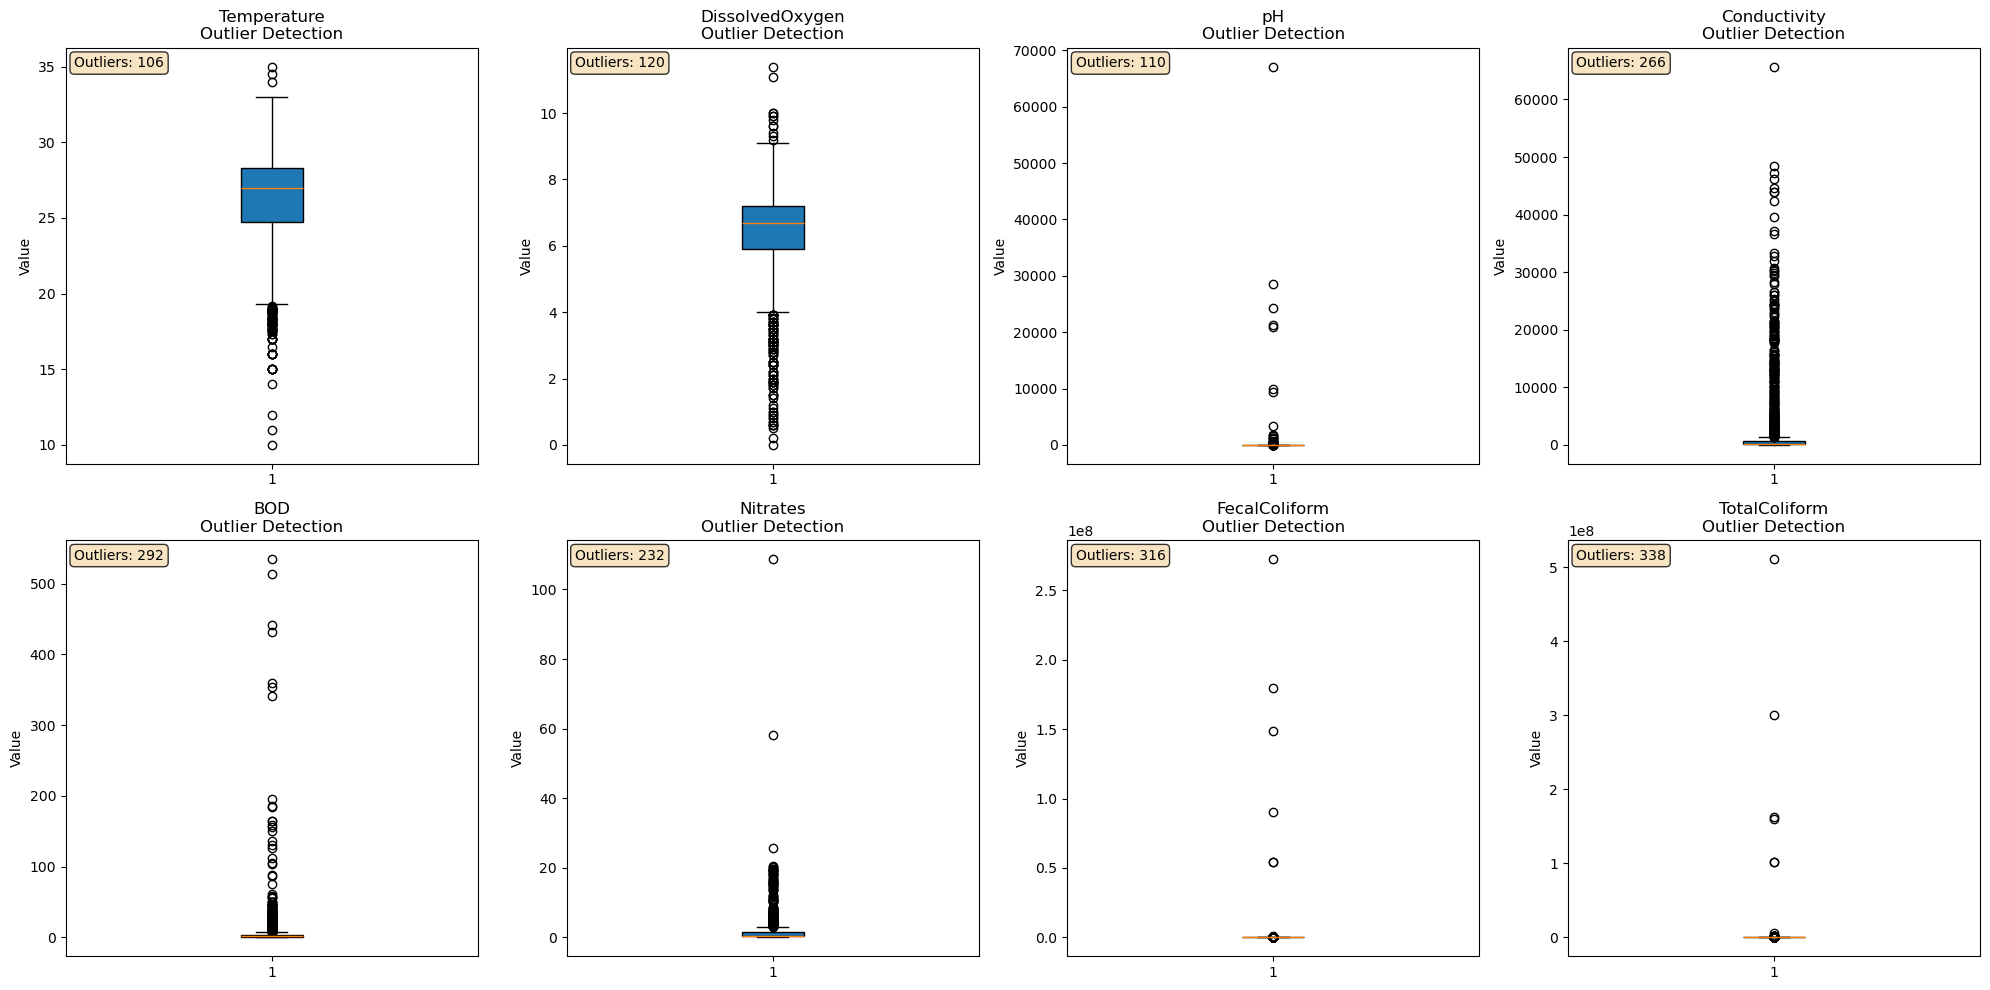

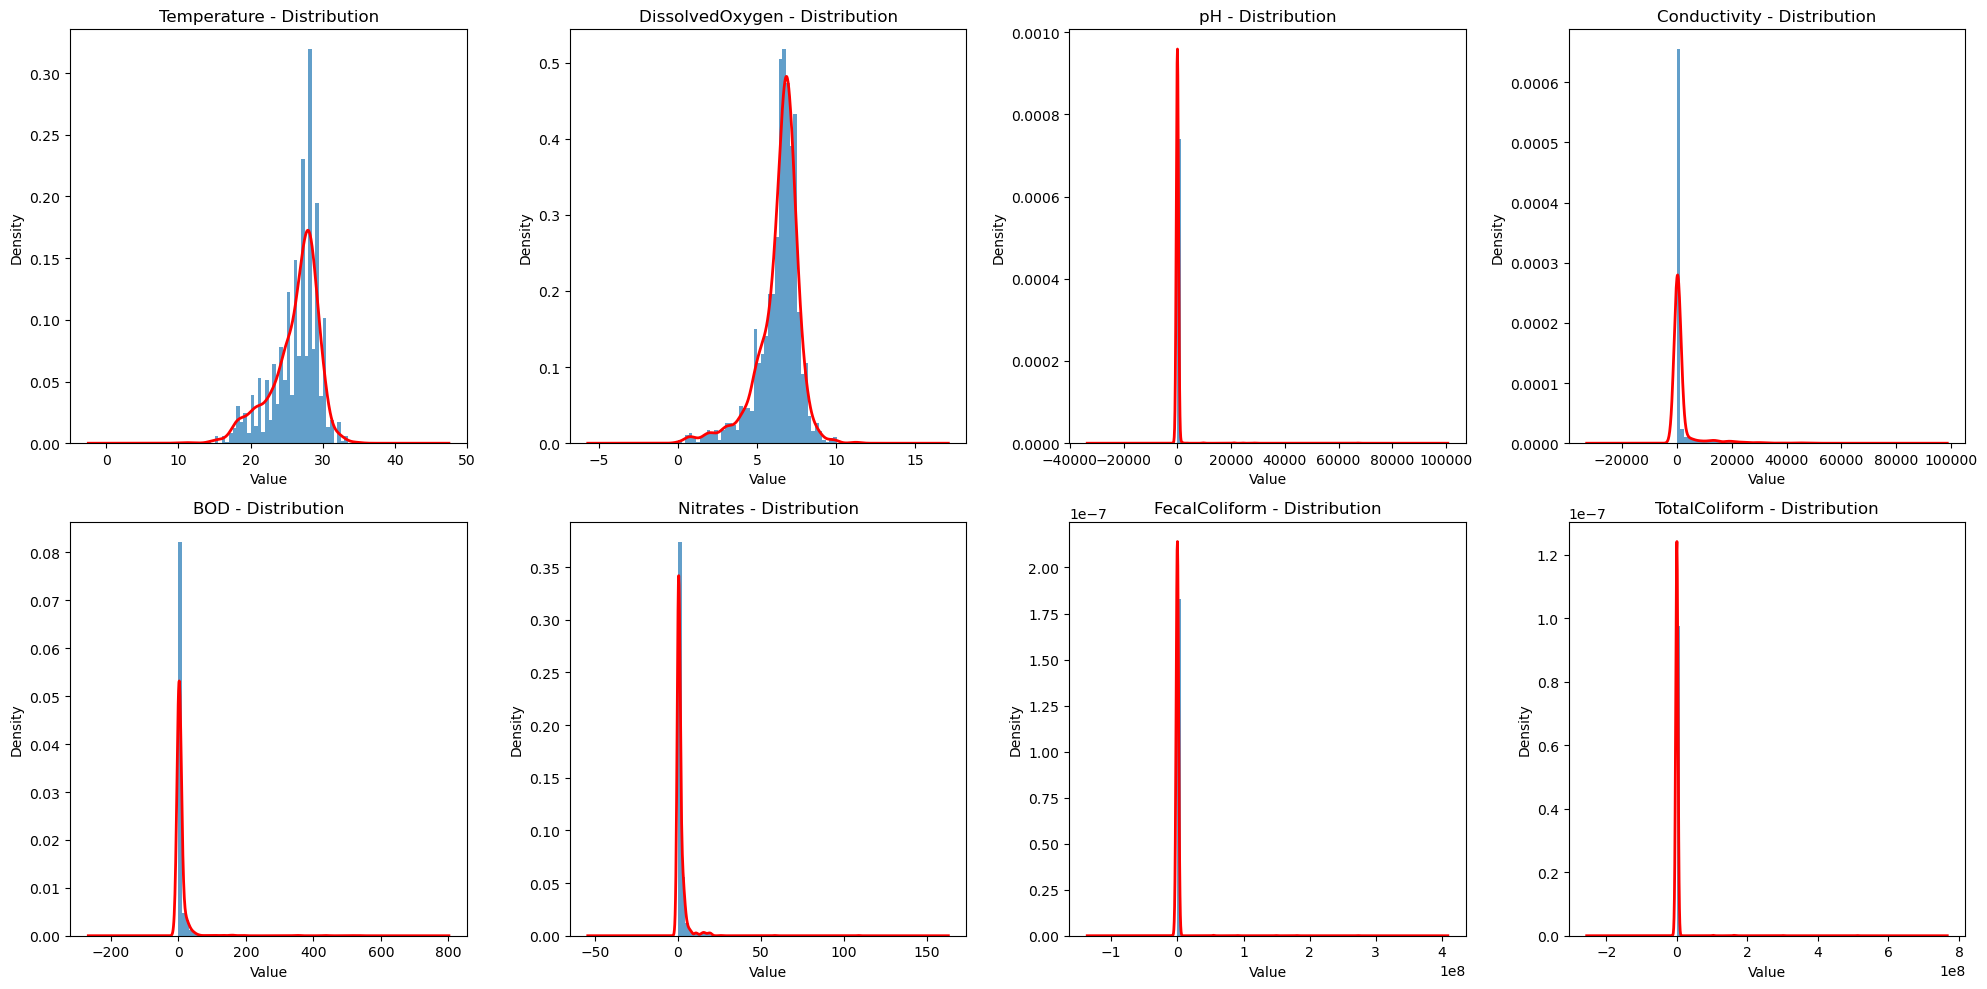


🛠️ HANDLING OUTLIERS - Method: CAP

📊 Dataset shape before: (1991, 8)
📊 Dataset shape after:  (1991, 8)


In [13]:
# Step 2A: Validate data ranges
validation = validate_water_quality_ranges(df_cleaned)

# Step 2B: Detect outliers using multiple methods
outliers, summary = detect_outliers_comprehensive(df_cleaned)

# Step 2C: Visualize the outliers
visualize_outliers(df_cleaned)

# Step 2D: Handle outliers (capping recommended)
df_final, outlier_summary = handle_outliers(df_cleaned, method='cap')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def clean_extreme_outliers(df):
    """Clean extreme outliers using domain knowledge"""
    print("🧹 CLEANING EXTREME OUTLIERS USING DOMAIN KNOWLEDGE")
    print("=" * 60)
    
    df_cleaned = df.copy()
    cleaning_log = {}
    
    # Define realistic upper bounds based on water quality standards
    realistic_bounds = {
        'pH': (4.0, 10.0),           # Realistic pH range for natural waters
        'Conductivity': (10, 5000),   # Typical conductivity range
        'BOD': (0.1, 50),            # Realistic BOD range
        'Nitrates': (0, 25),         # Realistic nitrate range
        'FecalColiform': (0, 50000),  # Realistic fecal coliform range
        'TotalColiform': (0, 100000), # Realistic total coliform range
        'Temperature': (10, 40),      # Realistic temperature range
        'DissolvedOxygen': (0, 15)    # Realistic DO range
    }
    
    print("📊 Cleaning Summary:")
    print("-" * 50)
    
    for param, (min_val, max_val) in realistic_bounds.items():
        if param in df_cleaned.columns:
            original_data = df_cleaned[param].copy()
            
            # Count extreme values
            below_extreme = (df_cleaned[param] < min_val).sum()
            above_extreme = (df_cleaned[param] > max_val).sum()
            total_extreme = below_extreme + above_extreme
            
            # Apply realistic bounds (capping)
            df_cleaned[param] = np.clip(df_cleaned[param], min_val, max_val)
            
            # Log the changes
            cleaning_log[param] = {
                'original_min': original_data.min(),
                'original_max': original_data.max(),
                'new_min': df_cleaned[param].min(),
                'new_max': df_cleaned[param].max(),
                'extreme_values_capped': total_extreme,
                'percentage_capped': (total_extreme / len(df_cleaned)) * 100
            }
            
            status = "✅" if total_extreme == 0 else "🔧"
            print(f"{status} {param:15} | Capped: {total_extreme:3} values ({(total_extreme/len(df_cleaned)*100):5.1f}%) | "
                  f"Range: [{min_val:6}, {max_val:6}]")
    
    return df_cleaned, cleaning_log

def apply_statistical_outlier_treatment(df, method='iqr_moderate'):
    """Apply statistical outlier treatment after extreme value cleaning"""
    print(f"\n📊 STATISTICAL OUTLIER TREATMENT - Method: {method.upper()}")
    print("=" * 60)
    
    df_treated = df.copy()
    treatment_log = {}
    
    water_params = ['Temperature', 'DissolvedOxygen', 'pH', 'Conductivity', 
                   'BOD', 'Nitrates', 'FecalColiform', 'TotalColiform']
    
    available_params = [col for col in water_params if col in df.columns]
    
    for param in available_params:
        original_data = df_treated[param].copy()
        
        if method == 'iqr_moderate':
            # Use 1.5 * IQR (standard)
            Q1 = df_treated[param].quantile(0.25)
            Q3 = df_treated[param].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
        elif method == 'iqr_conservative':
            # Use 3 * IQR (more conservative)
            Q1 = df_treated[param].quantile(0.25)
            Q3 = df_treated[param].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 3.0 * IQR
            upper_bound = Q3 + 3.0 * IQR
            
        elif method == 'percentile':
            # Use 5th and 95th percentiles
            lower_bound = df_treated[param].quantile(0.05)
            upper_bound = df_treated[param].quantile(0.95)
        
        # Count outliers before treatment
        outliers_before = ((original_data < lower_bound) | (original_data > upper_bound)).sum()
        
        # Apply treatment (capping)
        df_treated[param] = np.clip(df_treated[param], lower_bound, upper_bound)
        
        treatment_log[param] = {
            'outliers_treated': outliers_before,
            'percentage_treated': (outliers_before / len(df_treated)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
        
        print(f"✅ {param:15} | Outliers: {outliers_before:3} ({(outliers_before/len(df_treated)*100):5.1f}%) | "
              f"Bounds: [{lower_bound:8.2f}, {upper_bound:8.2f}]")
    
    return df_treated, treatment_log

def validate_final_data(df):
    """Final validation of cleaned data"""
    print(f"\n✅ FINAL DATA VALIDATION")
    print("=" * 50)
    
    # Check for any remaining invalid values
    validation_results = {}
    
    # Expected ranges after cleaning
    expected_ranges = {
        'Temperature': (10, 40),
        'DissolvedOxygen': (0, 15),
        'pH': (4.0, 10.0),
        'Conductivity': (10, 5000),
        'BOD': (0.1, 50),
        'Nitrates': (0, 25),
        'FecalColiform': (0, 50000),
        'TotalColiform': (0, 100000)
    }
    
    print("📊 Final Validation Results:")
    print("-" * 60)
    
    all_valid = True
    for param, (min_val, max_val) in expected_ranges.items():
        if param in df.columns:
            actual_min = df[param].min()
            actual_max = df[param].max()
            
            # Check if within expected range
            within_range = (actual_min >= min_val) and (actual_max <= max_val)
            
            validation_results[param] = {
                'min': actual_min,
                'max': actual_max,
                'within_expected_range': within_range
            }
            
            status = "✅" if within_range else "⚠️"
            print(f"{status} {param:15} | Expected: [{min_val:6}, {max_val:8}] | "
                  f"Actual: [{actual_min:8.2f}, {actual_max:8.2f}]")
            
            if not within_range:
                all_valid = False
    
    print(f"\n{'✅ All parameters within expected ranges!' if all_valid else '⚠️ Some parameters still outside expected ranges'}")
    
    # Data quality summary
    print(f"\n📈 DATA QUALITY SUMMARY:")
    print("-" * 30)
    print(f"Dataset shape: {df.shape}")
    print(f"Missing values: {df.isnull().sum().sum()}")
    print(f"Data types: {df.dtypes.value_counts().to_dict()}")
    
    # Basic statistics
    print(f"\n📊 CLEANED DATA STATISTICS:")
    print("-" * 40)
    stats_df = df.describe().round(2)
    print(stats_df)
    
    return validation_results

def create_before_after_comparison(df_original, df_cleaned):
    """Create before/after comparison visualizations"""
    print(f"\n📊 BEFORE/AFTER COMPARISON VISUALIZATION")
    print("=" * 50)
    
    water_params = ['Temperature', 'DissolvedOxygen', 'pH', 'Conductivity', 
                   'BOD', 'Nitrates', 'FecalColiform', 'TotalColiform']
    
    available_params = [col for col in water_params if col in df_original.columns and col in df_cleaned.columns]
    
    if len(available_params) == 0:
        print("No parameters available for comparison!")
        return
    
    n_params = len(available_params)
    n_cols = 4
    n_rows = (n_params + n_cols - 1) // n_cols
    
    # Box plot comparison
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for idx, param in enumerate(available_params):
        row = idx // n_cols
        col = idx % n_cols
        
        # Create comparison data
        comparison_data = [
            df_original[param].dropna().values,
            df_cleaned[param].dropna().values
        ]
        
        bp = axes[row, col].boxplot(comparison_data, labels=['Before', 'After'], patch_artist=True)
        bp['boxes'][0].set_facecolor('lightcoral')
        bp['boxes'][1].set_facecolor('lightblue')
        
        axes[row, col].set_title(f'{param}\nBefore vs After Cleaning')
        axes[row, col].set_ylabel('Value')
        
        # Add statistics
        orig_outliers = len([x for x in df_original[param] if x < np.percentile(df_original[param], 25) - 1.5*(np.percentile(df_original[param], 75) - np.percentile(df_original[param], 25)) or x > np.percentile(df_original[param], 75) + 1.5*(np.percentile(df_original[param], 75) - np.percentile(df_original[param], 25))])
        clean_outliers = len([x for x in df_cleaned[param] if x < np.percentile(df_cleaned[param], 25) - 1.5*(np.percentile(df_cleaned[param], 75) - np.percentile(df_cleaned[param], 25)) or x > np.percentile(df_cleaned[param], 75) + 1.5*(np.percentile(df_cleaned[param], 75) - np.percentile(df_cleaned[param], 25))])
        
        axes[row, col].text(0.02, 0.98, f'Outliers: {orig_outliers} → {clean_outliers}', 
                           transform=axes[row, col].transAxes, 
                           verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Hide empty subplots
    for idx in range(n_params, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].set_visible(False)
    
    plt.suptitle('Water Quality Parameters: Before vs After Cleaning', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Statistical comparison table
    comparison_stats = []
    for param in available_params:
        stats_row = {
            'Parameter': param,
            'Original_Min': df_original[param].min(),
            'Original_Max': df_original[param].max(),
            'Original_Mean': df_original[param].mean(),
            'Cleaned_Min': df_cleaned[param].min(),
            'Cleaned_Max': df_cleaned[param].max(),
            'Cleaned_Mean': df_cleaned[param].mean()
        }
        comparison_stats.append(stats_row)
    
    comparison_df = pd.DataFrame(comparison_stats)
    
    print("\n📋 Statistical Comparison Table:")
    print(comparison_df.round(2).to_string(index=False))
    
    return comparison_df

# Complete cleaning pipeline
def complete_data_cleaning_pipeline(df):
    """Complete data cleaning pipeline"""
    print("🌊 COMPLETE DATA CLEANING PIPELINE")
    print("=" * 60)
    
    print("Step 1: Cleaning extreme outliers...")
    df_step1, cleaning_log = clean_extreme_outliers(df)
    
    print("Step 2: Statistical outlier treatment...")
    df_step2, treatment_log = apply_statistical_outlier_treatment(df_step1, method='iqr_moderate')
    
    print("Step 3: Final validation...")
    validation_results = validate_final_data(df_step2)
    
    print("Step 4: Before/after comparison...")
    comparison_df = create_before_after_comparison(df, df_step2)
    
    return df_step2, {
        'cleaning_log': cleaning_log,
        'treatment_log': treatment_log,
        'validation_results': validation_results,
        'comparison_stats': comparison_df
    }


🌊 COMPLETE DATA CLEANING PIPELINE
Step 1: Cleaning extreme outliers...
🧹 CLEANING EXTREME OUTLIERS USING DOMAIN KNOWLEDGE
📊 Cleaning Summary:
--------------------------------------------------
🔧 pH              | Capped: 106 values (  5.3%) | Range: [   4.0,   10.0]
🔧 Conductivity    | Capped: 261 values ( 13.1%) | Range: [    10,   5000]
🔧 BOD             | Capped:  29 values (  1.5%) | Range: [   0.1,     50]
🔧 Nitrates        | Capped:   3 values (  0.2%) | Range: [     0,     25]
🔧 FecalColiform   | Capped:  46 values (  2.3%) | Range: [     0,  50000]
🔧 TotalColiform   | Capped:  57 values (  2.9%) | Range: [     0, 100000]
✅ Temperature     | Capped:   0 values (  0.0%) | Range: [    10,     40]
✅ DissolvedOxygen | Capped:   0 values (  0.0%) | Range: [     0,     15]
Step 2: Statistical outlier treatment...

📊 STATISTICAL OUTLIER TREATMENT - Method: IQR_MODERATE
✅ Temperature     | Outliers: 106 (  5.3%) | Bounds: [   19.30,    33.70]
✅ DissolvedOxygen | Outliers: 120 (  6.0%) |

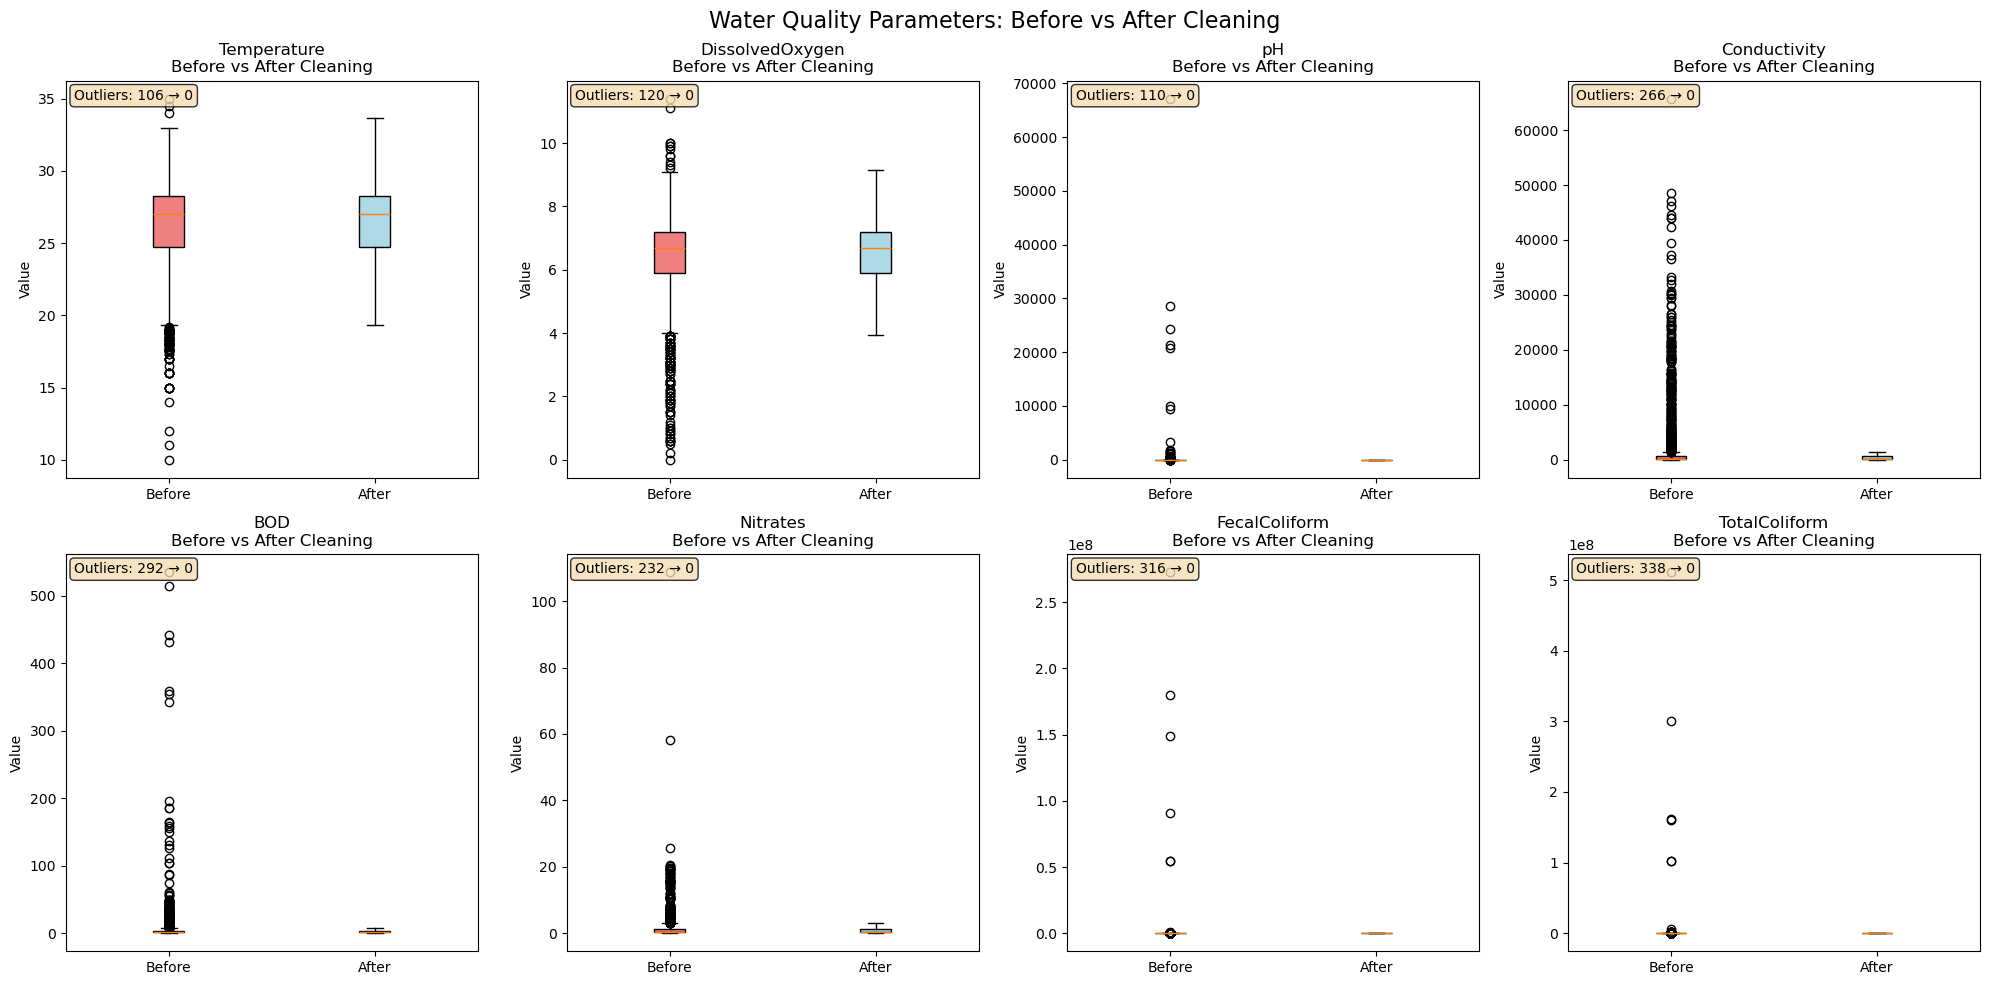


📋 Statistical Comparison Table:
      Parameter  Original_Min  Original_Max  Original_Mean  Cleaned_Min  Cleaned_Max  Cleaned_Mean
    Temperature          10.0          35.0          26.17        19.30        33.70         26.26
DissolvedOxygen           0.0          11.4           6.39         3.95         9.15          6.46
             pH           0.0       67115.0         111.88         5.70         8.90          7.33
   Conductivity           0.4       65700.0        1817.06        10.00      1395.25        418.76
            BOD           0.1         534.5           7.33         0.10         7.70          2.91
       Nitrates           0.0         108.7           1.54         0.00         3.11          0.99
  FecalColiform           0.0   272521616.0      408858.21         0.00      2491.25        674.54
  TotalColiform           0.0   511090873.0      697460.75         0.00      6451.00       1780.81


In [17]:
df_clean_final, cleaning_logs = complete_data_cleaning_pipeline(df_cleaned)

In [19]:
df_clean_final.head()

,Temperature,DissolvedOxygen,pH,Conductivity,BOD,Nitrates,FecalColiform,TotalColiform
0,30.6,6.7,7.5,203.0,7.7,0.1,11.00,27.0
1,29.8,5.7,7.2,189.0,2.0,0.2,2491.25,6451.0
2,29.5,6.3,6.9,179.0,1.7,0.1,2491.25,5330.0
3,29.7,5.8,6.9,64.0,3.8,0.5,2491.25,6451.0
4,29.5,5.8,7.3,83.0,1.9,0.4,2491.25,5500.0


## Feature engineering 

In [21]:
# Feature engineering + WQI + WQC for your dataset `df_clean_final`
# Paste and run this cell where df_clean_final is already defined.

import numpy as np
import pandas as pd

# ----------------- User-configurable params -----------------
# Which features to use for WQI (default set). Adjust if your dataset has different names.
WQI_FEATURES = ["DissolvedOxygen", "pH", "Conductivity", "BOD",
                "Nitrates", "FecalColiform", "TotalColiform"]
# If you want to use log coliforms in WQI, set use_log_coliforms = True
use_log_coliforms = True

# Optional custom weights for WQI (same order as WQI_FEATURES or adapted below)
# If None -> equal weights
WQI_WEIGHTS = None

# Which features should be considered "higher is worse" (we'll invert them before normalizing)
INVERT_HIGHER_WORSE = {"BOD", "Nitrates", "FecalColiform_log", "TotalColiform_log", "Conductivity"}

# ----------------- Safety checks -----------------
if 'df_clean_final' not in globals():
    raise RuntimeError("`df_clean_final` not found in the current environment. Load your dataframe before running this cell.")

df = df_clean_final.copy()  # work on copy, then assign back at end

# required basic columns check
required = set(WQI_FEATURES)
missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns for default WQI_FEATURES: {missing}. Rename or create them before running.")

# ----------------- Step 1: Feature engineering -----------------
# Create safe, robust engineered features

# 1) Log transforms for coliforms (avoid negatives)
df["FecalColiform_log"] = np.log1p(df["FecalColiform"].clip(lower=0))
df["TotalColiform_log"] = np.log1p(df["TotalColiform"].clip(lower=0))

# 2) Ratios & interactions
eps = 1e-8
df["BOD_DO_ratio"] = df["BOD"] / (df["DissolvedOxygen"] + eps)
df["Coliform_ratio"] = df["FecalColiform"] / (df["TotalColiform"] + eps)
df["Cond_Nitrates"] = df["Conductivity"] * df["Nitrates"]

# 3) pH non-linear: distance from neutral (captures both high & low pH harm)
df["pH_sq"] = (df["pH"] - 7.0) ** 2

# 4) Optional domain flag(s)
df["low_DO_flag"] = (df["DissolvedOxygen"] < 3.0).astype(int)   # adjust threshold as needed

# ----------------- Step 2: Compute WQI -----------------
def compute_wqi(df,
                feature_list=None,
                weights=None,
                invert_higher_worse=None):
    """
    Compute a simple WQI:
      - Optionally invert 'higher is worse' features
      - Min-max normalize each selected feature to 0-100
      - Weighted average across features
    """
    if feature_list is None:
        raise ValueError("feature_list must be provided")
    # Prepare feature names: if using log coliforms replace originals
    flist = []
    for f in feature_list:
        if f == "FecalColiform" and use_log_coliforms:
            if "FecalColiform_log" in df.columns:
                flist.append("FecalColiform_log")
            else:
                flist.append("FecalColiform")
        elif f == "TotalColiform" and use_log_coliforms:
            if "TotalColiform_log" in df.columns:
                flist.append("TotalColiform_log")
            else:
                flist.append("TotalColiform")
        else:
            flist.append(f)
    # keep only columns that actually exist
    flist = [c for c in flist if c in df.columns]
    if not flist:
        raise ValueError("No valid WQI features found in dataframe.")
    # weights
    if weights is None:
        weights = np.ones(len(flist))
    else:
        weights = np.array(weights)
        if weights.shape[0] != len(flist):
            raise ValueError("weights length must equal number of chosen features after mapping.")
    invert_set = set(invert_higher_worse or INVERT_HIGHER_WORSE)

    # build normalized 0-100 for each column
    norm_df = pd.DataFrame(index=df.index)
    for col in flist:
        arr = df[col].astype(float).values
        vmin = np.nanmin(arr)
        vmax = np.nanmax(arr)
        if np.isclose(vmax, vmin):
            # constant column -> give neutral/high score (100) to avoid divide-by-zero
            norm = np.full_like(arr, 100.0, dtype=float)
        else:
            if col in invert_set:
                # higher is worse -> invert so larger normalized = better
                norm = (vmax - arr) / (vmax - vmin) * 100.0
            else:
                norm = (arr - vmin) / (vmax - vmin) * 100.0
        norm_df[col] = norm

    # weighted average -> WQI 0..100
    weighted = norm_df.values * weights.reshape(1, -1)
    wqi_scores = weighted.sum(axis=1) / weights.sum()
    return pd.Series(wqi_scores, index=df.index)

# Compute WQI and add to df
df["WQI"] = compute_wqi(df, feature_list=WQI_FEATURES, weights=WQI_WEIGHTS,
                        invert_higher_worse=INVERT_HIGHER_WORSE)

# ----------------- Step 2b: WQC categories -----------------
def classify_wqi_simple(wqi):
    # bins: adjust thresholds if you prefer different categories
    if wqi >= 90:
        return "Excellent"
    elif wqi >= 70:
        return "Good"
    elif wqi >= 50:
        return "Medium"
    elif wqi >= 25:
        return "Poor"
    else:
        return "Very Poor"

df["WQC"] = df["WQI"].apply(classify_wqi_simple)

# ----------------- Finalize: assign back and show head -----------------
df_clean_final = df  # overwrite / update back to this name in your environment
print("Feature engineering + WQI/WQC completed. Showing top rows:")
display(df_clean_final.head())


Feature engineering + WQI/WQC completed. Showing top rows:


,Temperature,DissolvedOxygen,pH,Conductivity,BOD,Nitrates,FecalColiform,TotalColiform,FecalColiform_log,TotalColiform_log,BOD_DO_ratio,Coliform_ratio,Cond_Nitrates,pH_sq,low_DO_flag,WQI,WQC
0,30.6,6.7,7.5,203.0,7.7,0.1,11.00,27.0,2.484907,3.332205,1.149254,0.407407,20.3,0.25,0,60.318286,Medium
1,29.8,5.7,7.2,189.0,2.0,0.2,2491.25,6451.0,7.820941,8.772145,0.350877,0.386180,37.8,0.04,0,48.025160,Poor
2,29.5,6.3,6.9,179.0,1.7,0.1,2491.25,5330.0,7.820941,8.581294,0.269841,0.467402,17.9,0.01,0,49.771419,Poor
3,29.7,5.8,6.9,64.0,3.8,0.5,2491.25,6451.0,7.820941,8.772145,0.655172,0.386180,32.0,0.01,0,43.488190,Poor
4,29.5,5.8,7.3,83.0,1.9,0.4,2491.25,5500.0,7.820941,8.612685,0.327586,0.452955,33.2,0.09,0,49.368425,Poor


# Now Model building 

## wqi - regression 
## wqc - classification 



In [22]:
# === WQI modeling: train multiple regressors, tune hyperparams, pick best ===
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")

# ---------- Config ----------
RANDOM_STATE = 42
TEST_SIZE = 0.20
CV_FOLDS = 5
N_ITER_RANDOM = 30   # for RandomizedSearch

# ---------- Check dataframe ----------
if 'df_clean_final' not in globals():
    raise RuntimeError("df_clean_final not found. Load your dataframe first.")

df = df_clean_final.copy()

# Ensure target exists
if "WQI" not in df.columns:
    raise RuntimeError("WQI column not found in df_clean_final. Create WQI first (feature-engineering step).")

# Features: drop WQI and WQC (keep engineered features)
X = df.drop(columns=["WQI", "WQC"], errors='ignore')
y = df["WQI"].astype(float)

# Keep numeric columns only (models expect numeric)
X = X.select_dtypes(include=[np.number]).copy()
print(f"Using {X.shape[1]} numeric features and {len(y)} rows.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)
print(f"Train: {X_train.shape[0]} rows, Test: {X_test.shape[0]} rows")

# ---------- Helper: compute metrics ----------
def regression_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

# ---------- Models & hyperparameter searches ----------
results = []

# 1) Linear Regression (no scaling in pipeline not necessary but we'll scale)
pipe_lr = Pipeline([("scaler", StandardScaler()), ("lr", LinearRegression())])
cv_rmse = -cross_val_score(pipe_lr, X_train, y_train, cv=CV_FOLDS,
                           scoring="neg_mean_squared_error", n_jobs=-1).mean() ** 0.5
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
results.append(("LinearRegression", {"cv_RMSE": cv_rmse}, regression_metrics(y_test, y_pred), pipe_lr))

# 2) Ridge (GridSearch over alpha)
pipe_ridge = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge(random_state=RANDOM_STATE))])
param_grid = {"ridge__alpha": [0.01, 0.1, 1.0, 10.0, 50.0]}
gs_ridge = GridSearchCV(pipe_ridge, param_grid, cv=CV_FOLDS, scoring="neg_mean_squared_error", n_jobs=-1)
gs_ridge.fit(X_train, y_train)
best_ridge = gs_ridge.best_estimator_
cv_rmse = (-gs_ridge.best_score_) ** 0.5
y_pred = best_ridge.predict(X_test)
results.append(("Ridge", {"cv_RMSE": cv_rmse, "best_params": gs_ridge.best_params_},
                regression_metrics(y_test, y_pred), best_ridge))

# 3) Lasso (GridSearch)
pipe_lasso = Pipeline([("scaler", StandardScaler()), ("lasso", Lasso(max_iter=20000, random_state=RANDOM_STATE))])
param_grid = {"lasso__alpha": [0.0001, 0.001, 0.01, 0.1, 1.0]}
gs_lasso = GridSearchCV(pipe_lasso, param_grid, cv=CV_FOLDS, scoring="neg_mean_squared_error", n_jobs=-1)
gs_lasso.fit(X_train, y_train)
best_lasso = gs_lasso.best_estimator_
cv_rmse = (-gs_lasso.best_score_) ** 0.5
y_pred = best_lasso.predict(X_test)
results.append(("Lasso", {"cv_RMSE": cv_rmse, "best_params": gs_lasso.best_params_},
                regression_metrics(y_test, y_pred), best_lasso))

# 4) Random Forest (RandomizedSearch)
rf = RandomForestRegressor(random_state=RANDOM_STATE)
rf_param_dist = {
    "n_estimators": [100, 200, 400],
    "max_depth": [None, 6, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
rscv_rf = RandomizedSearchCV(rf, rf_param_dist, n_iter=N_ITER_RANDOM, cv=CV_FOLDS,
                             scoring="neg_mean_squared_error", random_state=RANDOM_STATE, n_jobs=-1)
t0 = time.time()
rscv_rf.fit(X_train, y_train)
t_rf = time.time() - t0
best_rf = rscv_rf.best_estimator_
cv_rmse = (-rscv_rf.best_score_) ** 0.5
y_pred = best_rf.predict(X_test)
results.append(("RandomForest", {"cv_RMSE": cv_rmse, "best_params": rscv_rf.best_params_, "fit_time_s": t_rf},
                regression_metrics(y_test, y_pred), best_rf))

# 5) Gradient Boosting (sklearn) (RandomizedSearch)
gb = GradientBoostingRegressor(random_state=RANDOM_STATE)
gb_param_dist = {
    "n_estimators": [100, 200, 400],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4, 6]
}
rscv_gb = RandomizedSearchCV(gb, gb_param_dist, n_iter=N_ITER_RANDOM, cv=CV_FOLDS,
                             scoring="neg_mean_squared_error", random_state=RANDOM_STATE, n_jobs=-1)
t0 = time.time()
rscv_gb.fit(X_train, y_train)
t_gb = time.time() - t0
best_gb = rscv_gb.best_estimator_
cv_rmse = (-rscv_gb.best_score_) ** 0.5
y_pred = best_gb.predict(X_test)
results.append(("GradientBoosting", {"cv_RMSE": cv_rmse, "best_params": rscv_gb.best_params_, "fit_time_s": t_gb},
                regression_metrics(y_test, y_pred), best_gb))

# 6) XGBoost (optional if installed)
try:
    import xgboost as xgb
    xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=RANDOM_STATE, verbosity=0)
    xgb_param_dist = {
        "n_estimators": [100, 200, 400],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 4, 6],
        "subsample": [0.6, 0.8, 1.0]
    }
    rscv_xgb = RandomizedSearchCV(xgb_model, xgb_param_dist, n_iter=N_ITER_RANDOM, cv=CV_FOLDS,
                                  scoring="neg_mean_squared_error", random_state=RANDOM_STATE, n_jobs=-1)
    t0 = time.time()
    rscv_xgb.fit(X_train, y_train)
    t_xgb = time.time() - t0
    best_xgb = rscv_xgb.best_estimator_
    cv_rmse = (-rscv_xgb.best_score_) ** 0.5
    y_pred = best_xgb.predict(X_test)
    results.append(("XGBoost", {"cv_RMSE": cv_rmse, "best_params": rscv_xgb.best_params_, "fit_time_s": t_xgb},
                    regression_metrics(y_test, y_pred), best_xgb))
except Exception:
    print("XGBoost not available or failed to run -- skipping XGBoost.")

# ---------- Summarize results ----------
summary_rows = []
for name, meta, metrics_dict, model in results:
    row = {
        "model": name,
        "cv_RMSE": meta.get("cv_RMSE"),
        "test_RMSE": metrics_dict["RMSE"],
        "test_MAE": metrics_dict["MAE"],
        "test_R2": metrics_dict["R2"],
        "best_params": meta.get("best_params", None),
        "fit_time_s": meta.get("fit_time_s", None)
    }
    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows).sort_values("cv_RMSE").reset_index(drop=True)
print("\n=== Model comparison (sorted by CV RMSE) ===")
display(summary_df)

# Best model: take the top row
best_row = summary_df.iloc[0]
best_name = best_row["model"]
best_model = None
for name, meta, metrics_dict, model in results:
    if name == best_name:
        best_model = model
        break

print(f"\nSelected best model: {best_name}")
print("CV RMSE:", best_row["cv_RMSE"])
print("Test RMSE:", best_row["test_RMSE"], "Test MAE:", best_row["test_MAE"], "Test R2:", best_row["test_R2"])

# ---------- Feature importance plot (if tree model) ----------
if hasattr(best_model, "feature_importances_"):
    fi = best_model.feature_importances_
    fi_df = pd.Series(fi, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    fi_df.plot(kind="bar")
    plt.title(f"Feature importances: {best_name}")
    plt.ylabel("importance")
    plt.tight_layout()
    plt.show()
else:
    print("Best model is not tree-based or doesn't provide feature_importances_.")


# Optional: show predictions vs actual for test set
y_test_pred = best_model.predict(X_test)
comp = pd.DataFrame({"y_true": y_test, "y_pred": y_test_pred})
print("\nSample predictions (top 10 rows):")
display(comp.head(10))


Using 15 numeric features and 1991 rows.
Train: 1592 rows, Test: 399 rows

=== Model comparison (sorted by CV RMSE) ===


,model,cv_RMSE,test_RMSE,test_MAE,test_R2,best_params,fit_time_s
0,Ridge,0.000221,1.811438e-04,1.368773e-04,1.000000,{'ridge__alpha': 0.01},NaN
1,Lasso,0.001088,1.123185e-03,8.512328e-04,1.000000,{'lasso__alpha': 0.0001},NaN
2,XGBoost,1.301415,1.096465e+00,8.071097e-01,0.994970,"{'subsample': 0.8, 'n_estimators': 400, 'max_d...",26.173465
3,GradientBoosting,1.321865,1.213526e+00,9.330122e-01,0.993839,"{'n_estimators': 400, 'max_depth': 2, 'learnin...",89.454113
4,RandomForest,2.456176,2.420177e+00,1.635555e+00,0.975495,"{'n_estimators': 400, 'min_samples_split': 2, ...",172.308646
5,LinearRegression,NaN,1.008904e-14,7.466041e-15,1.000000,None,NaN



Selected best model: Ridge
CV RMSE: 0.00022067793134540815
Test RMSE: 0.00018114384675547898 Test MAE: 0.000136877289040931 Test R2: 0.9999999998627179
Best model is not tree-based or doesn't provide feature_importances_.

Sample predictions (top 10 rows):


,y_true,y_pred
887,63.460509,63.460431
1670,50.503175,50.503122
414,41.764662,41.764791
1080,63.914343,63.914351
1102,56.215732,56.215711
998,58.259786,58.259893
1216,55.050047,55.050180
1436,56.935115,56.935199
767,43.845341,43.845674
1801,64.204902,64.204824


Train: 1592 rows, Test: 399 rows

=== LogisticRegression ===
Accuracy: 0.8922305764411027
Classification Report:
               precision    recall  f1-score   support

        Good       0.97      0.79      0.87        38
      Medium       0.88      0.96      0.91       225
        Poor       0.87      0.77      0.82        99
   Very Poor       0.97      0.95      0.96        37

    accuracy                           0.89       399
   macro avg       0.92      0.86      0.89       399
weighted avg       0.89      0.89      0.89       399



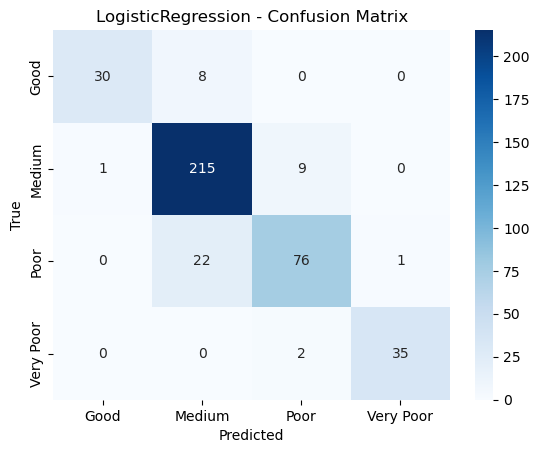


=== RandomForest ===
Accuracy: 0.9072681704260651
Classification Report:
               precision    recall  f1-score   support

        Good       0.97      0.76      0.85        38
      Medium       0.89      0.96      0.93       225
        Poor       0.91      0.81      0.86        99
   Very Poor       0.97      0.97      0.97        37

    accuracy                           0.91       399
   macro avg       0.93      0.88      0.90       399
weighted avg       0.91      0.91      0.91       399



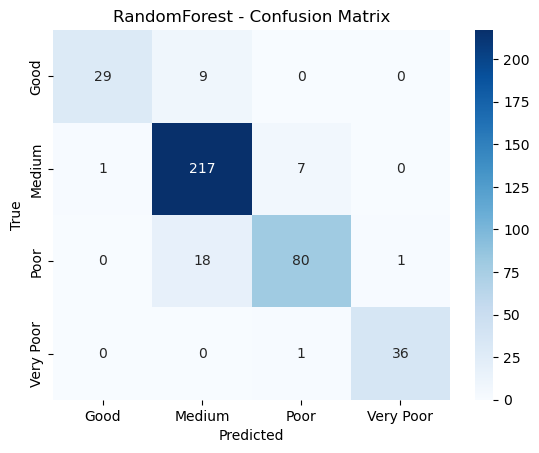


=== GradientBoosting ===
Accuracy: 0.924812030075188
Classification Report:
               precision    recall  f1-score   support

        Good       0.91      0.76      0.83        38
      Medium       0.91      0.97      0.94       225
        Poor       0.96      0.86      0.90        99
   Very Poor       0.95      0.97      0.96        37

    accuracy                           0.92       399
   macro avg       0.93      0.89      0.91       399
weighted avg       0.93      0.92      0.92       399



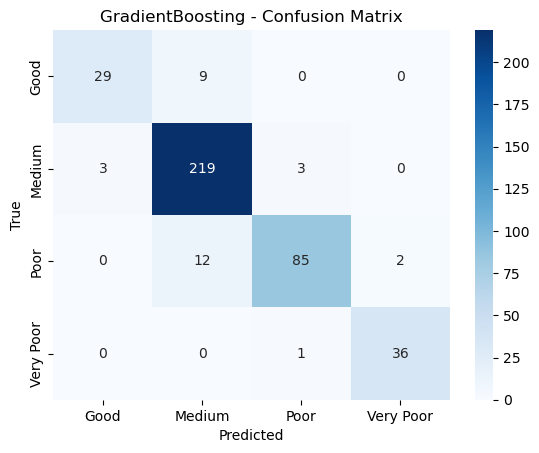

XGBoost not available or failed -- skipping XGBoost

=== Summary of CV Accuracies ===


,BestParams,Accuracy
LogisticRegression,{'logreg__C': 10},0.897005
RandomForest,"{'max_depth': None, 'n_estimators': 400}",0.925906
GradientBoosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.934065


In [ ]:
# === WQC Classification Pipeline ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# ---------------- Data ----------------
X = df_clean_final.drop(columns=["WQI", "WQC"], errors="ignore")
y = df_clean_final["WQC"]

# Keep only numeric columns
X = X.select_dtypes(include=[np.number])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train: {X_train.shape[0]} rows, Test: {X_test.shape[0]} rows")

# ---------------- Helper: Evaluate ----------------
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=sorted(y_test.unique()))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=sorted(y_test.unique()), 
                yticklabels=sorted(y_test.unique()))
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# ---------------- Models ----------------
results = {}

# 1) Logistic Regression
pipe_log = Pipeline([("scaler", StandardScaler()), 
                     ("logreg", LogisticRegression(max_iter=2000, multi_class="ovr"))])
param_grid = {"logreg__C":[0.01,0.1,1,10]}
gs_log = GridSearchCV(pipe_log, param_grid, cv=5, scoring="accuracy")
gs_log.fit(X_train, y_train)
evaluate_model(gs_log.best_estimator_, X_test, y_test, "LogisticRegression")
results["LogisticRegression"] = {"BestParams": gs_log.best_params_,
                                 "Accuracy": gs_log.best_score_}

# 2) Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid = {"n_estimators":[100,200,400],
              "max_depth":[None,5,10,20]}
gs_rf = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
gs_rf.fit(X_train, y_train)
evaluate_model(gs_rf.best_estimator_, X_test, y_test, "RandomForest")
results["RandomForest"] = {"BestParams": gs_rf.best_params_,
                           "Accuracy": gs_rf.best_score_}

# 3) Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
param_grid = {"n_estimators":[100,200,400],
              "learning_rate":[0.01,0.05,0.1],
              "max_depth":[2,3,5]}
gs_gb = GridSearchCV(gb, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
gs_gb.fit(X_train, y_train)
evaluate_model(gs_gb.best_estimator_, X_test, y_test, "GradientBoosting")
results["GradientBoosting"] = {"BestParams": gs_gb.best_params_,
                               "Accuracy": gs_gb.best_score_}

# 4) XGBoost (if installed)
try:
    import xgboost as xgb
    xgb_clf = xgb.XGBClassifier(objective="multi:softmax", eval_metric="mlogloss", use_label_encoder=False, random_state=42)
    param_dist = {"n_estimators":[100,200,400],
                  "learning_rate":[0.01,0.05,0.1],
                  "max_depth":[3,5,7]}
    gs_xgb = GridSearchCV(xgb_clf, param_dist, cv=5, scoring="accuracy", n_jobs=-1)
    gs_xgb.fit(X_train, y_train)
    evaluate_model(gs_xgb.best_estimator_, X_test, y_test, "XGBoost")
    results["XGBoost"] = {"BestParams": gs_xgb.best_params_,
                          "Accuracy": gs_xgb.best_score_}
except Exception:
    print("XGBoost not available or failed -- skipping XGBoost")
best_class_model = best_clf
# ---------------- Results Summary ----------------
print("\n=== Summary of CV Accuracies ===")
results_df = pd.DataFrame(results).T
display(results_df)


By - Amirtha Ganesh R